In [1]:
import sys
sys.path.append("../../")

In [2]:
from delay.delay import *
import delay.calculator as calc
from delay.strategy import fA_HardInterval, fB_HardInterval, showIntervalFunctions
from delay.simulation import Simulation, FunctionType
from delay.regression import linearRegression, Dependence
from delay.value import calculateValue

In [3]:
filePrefix = 'exp-step'

In [4]:
simulation = Simulation(FunctionType.HARD_INTERVAL, (0, 0), calculateValue, calc.smooth(d=20))
simulation.setN(100)
simulation.setConv(100)
simulation.setDuration(100000000) # 10^8
simulation.setD(20)

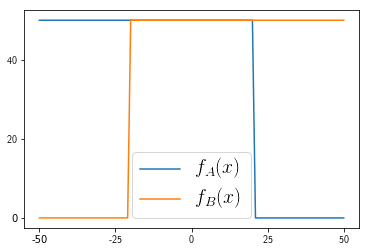

In [5]:
N = 100
showIntervalFunctions(fA_HardInterval, fB_HardInterval, N, d=20)

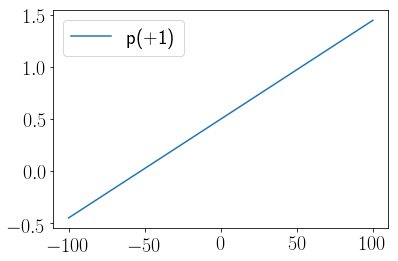

In [6]:
calc.plot(calc.smooth(N=100))

µ =  -0.013225652432986774


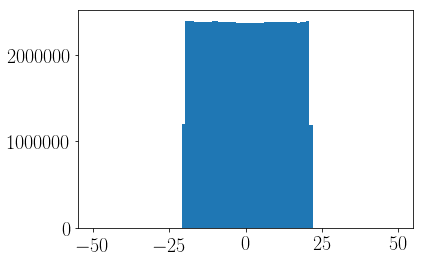

In [7]:
simulation.setTau((0, 0))
simulation.run()
simulation.plotOnlyHistogram('../../../draft/img/results/'+filePrefix+'/histogram0')

µ =  -3.0507925485884235


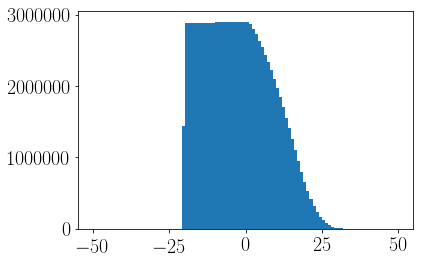

In [8]:
simulation.setTau((20, 0))
simulation.run()
simulation.plotOnlyHistogram('../../../draft/img/results/'+filePrefix+'/histogram-tauA')

µ =  3.082112393995797


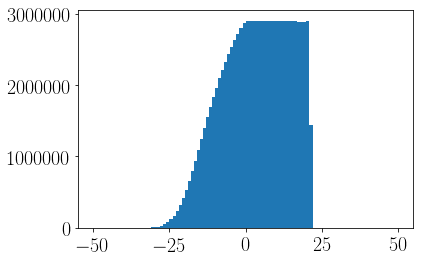

In [9]:
simulation.setTau((0, 20))
simulation.run()
simulation.plotOnlyHistogram('../../../draft/img/results/'+filePrefix+'/histogram-tauB')

d, τ, µ
20 ,  0 ,  0.037683417964962315
20 ,  10 ,  -1.54623801371519
20 ,  20 ,  -3.1352654781420637
20 ,  30 ,  -4.242073792336358
20 ,  40 ,  -4.845654728754437
20 ,  50 ,  -4.92738658569141
20 ,  60 ,  -4.993761309936595
20 ,  70 ,  -4.968633985668437
20 ,  80 ,  -4.983095793271735
20 ,  90 ,  -4.933630943490191
20 ,  100 ,  -4.934858111604468
20 ,  110 ,  -4.8711320662500315
20 ,  120 ,  -4.832838956160479
20 ,  130 ,  -4.757306938621773
20 ,  140 ,  -4.706640467683709
20 ,  150 ,  -4.709674785869661
20 ,  160 ,  -4.636661791153632
20 ,  170 ,  -4.632912688988201
20 ,  180 ,  -4.564021931313436
20 ,  190 ,  -4.47573183453565
20 ,  200 ,  -4.449975343083869
20 ,  210 ,  -4.414603655551842
20 ,  220 ,  -4.340601717441949
20 ,  230 ,  -4.305520876334409
20 ,  240 ,  -4.277419733391782
20 ,  250 ,  -4.256056082907523
20 ,  260 ,  -4.222037674249095
20 ,  270 ,  -4.096484036931953
20 ,  280 ,  -4.1301474590315435
20 ,  290 ,  -4.083481045174676
Mean squared error: 1.00
Variance score: 

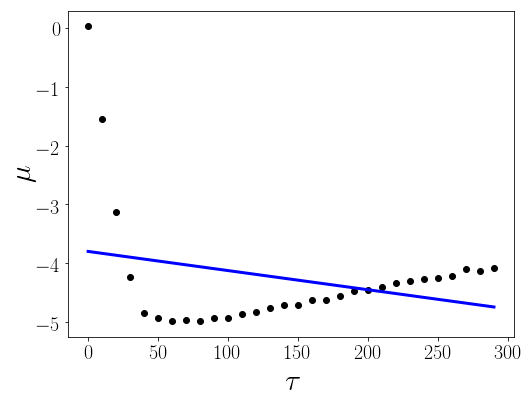

In [12]:
taus, mus = [], [] 
simulation.setD(20)

print('d, τ, µ')
for i in range(0, 30):
    tauA = i * 10
    simulation.setTau((tauA, 0))
    simulation.run()
    simulation.systematicInfo()
    taus.append(tauA)
    mus.append(simulation.getAverage())
    
linearRegression(taus, mus, Dependence.TAU, '../../../draft/img/results/'+filePrefix+'/tau-d50');
    

d, τ, µ
0 ,  50 ,  0.2969496635220238
2 ,  50 ,  0.17723615322488434
4 ,  50 ,  -0.258940842024373
6 ,  50 ,  -0.826760754427458
8 ,  50 ,  -1.4537820967808088
10 ,  50 ,  -2.0803432333482856
12 ,  50 ,  -2.702477569493389
14 ,  50 ,  -3.2778373120341744
16 ,  50 ,  -3.8519789133820925
18 ,  50 ,  -4.412885147943369
20 ,  50 ,  -4.932003525030705
22 ,  50 ,  -5.4533138901989355
24 ,  50 ,  -5.908211007913177
26 ,  50 ,  -6.354839983029912
28 ,  50 ,  -6.71532227741338
30 ,  50 ,  -6.9383209935556485
32 ,  50 ,  -7.30329170449168
34 ,  50 ,  -7.355902508740595
36 ,  50 ,  -7.4497937699821755
38 ,  50 ,  -7.770999856775751
40 ,  50 ,  -7.96619780701982
42 ,  50 ,  -7.936727214990619
44 ,  50 ,  -7.78271642245687
46 ,  50 ,  -7.151830205587154
47 ,  50 ,  -6.41004907578255
48 ,  50 ,  -5.3569555735100085
49 ,  50 ,  -3.265005575404697
50 ,  50 ,  0.08238273625843034
52 ,  50 ,  0.23077818012114026
54 ,  50 ,  -0.06306453429051656
56 ,  50 ,  -0.2335946103277815
58 ,  50 ,  0.3244122257723

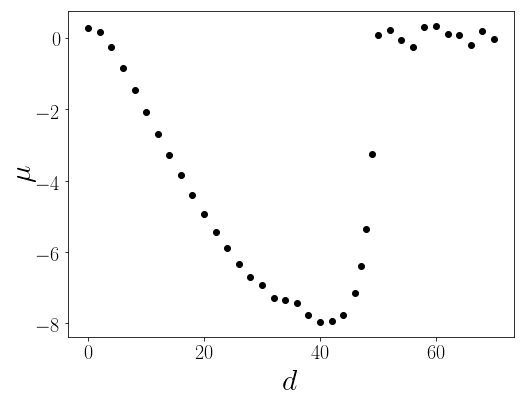

In [11]:
ds, mus = [], []
simulation.setTau((50, 0))

print('d, τ, µ')
_ = np.arange(0, 48, step=2)
_ = np.union1d(_, np.arange(47, 51))
_ = np.union1d(_, np.arange(52, 72, step=2))
for d in _:
    simulation.setD(d)
    simulation.run()
    simulation.systematicInfo()
    ds.append(d)
    mus.append(simulation.getAverage())
    
linearRegression(ds, mus, Dependence.D, '../../../draft/img/results/'+filePrefix+'/d-tau50', showFit=False);